In [1]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('month_data_stata.csv',  header=0)

In [2]:
df_train  = df.train_p
df_test  = df.test_p
df = df[df.columns[1:12]].dropna()

In [3]:
model = pm.auto_arima(df.newlnp, start_p=4,start_q=2,
                      information_criterion='aic',
                      test='adf',   
                      max_p=6, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=159.363, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=258.730, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=225.169, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=162.353, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=158.052, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=156.627, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=154.832, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=153.110, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=154.778, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=152.852, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.744 seconds
                               SARIMAX Results                                
Dep. Variable:               

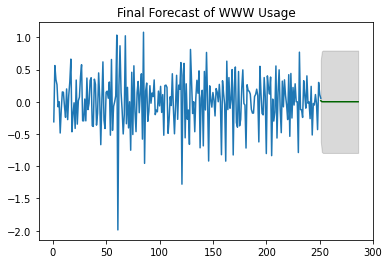

In [4]:
# Forecast
n_periods = 36
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.newlnp), len(df.newlnp)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.newlnp)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [6]:
X = df.newlnp
size = 214
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [7]:
print(len(train))
print(len(test))
print(len(history))

214
37
214


In [8]:
test = [x for x in test]

In [9]:
model = ARIMA(history, order=(0,0,2))
model_fit = model.fit()
train_pr=model_fit.predict(0,213)  # 95% conf
test_pr=model_fit.predict(214,250)
train_prd=[]
for i in train_pr:
    train_prd.append(i)
test_unroll_prd=[]
for i in test_pr:
    test_unroll_prd.append(i)
print(len(test_unroll_prd))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


37


In [10]:
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.384884, expected=0.319943
predicted=0.173274, expected=-0.078781
predicted=0.196789, expected=0.339507
predicted=-0.041408, expected=0.096730
predicted=-0.138119, expected=-0.053245
predicted=-0.097690, expected=-0.276509
predicted=0.107241, expected=0.419610
predicted=-0.183423, expected=-0.536144
predicted=0.179205, expected=0.438505
predicted=-0.106313, expected=-0.252175
predicted=0.044080, expected=0.221639
predicted=-0.098032, expected=-0.051293
predicted=-0.078370, expected=0.278203
predicted=-0.276688, expected=0.000000
predicted=-0.290742, expected=0.000000
predicted=-0.281388, expected=-0.787599
predicted=0.303839, expected=0.768907
predicted=-0.230187, expected=-0.121890
predicted=-0.188985, expected=-0.123233
predicted=-0.074548, expected=-0.243230
predicted=0.110254, expected=0.326297
predicted=-0.124227, expected=0.099255
predicted=-0.218586, expected=-0.099255
predicted=-0.141885, expected=0.401536
predicted=-0.434167, expected=-0.023257
predicted=-0.432950, 

In [11]:
a = [np.nan for x in range(213)]
print(len(a))

213


In [12]:
test_prd = [np.nan for x in range(214)]
test_un_prd = [np.nan for y in range(214)]
for i in predictions:
    test_prd.append(i)
print(len(test_prd))
for i in test_unroll_prd:
    test_un_prd.append(i)
print(len(test_un_prd))
for i in range(37):
    train_prd.append(np.nan)
len(train_prd)

251
251


251

In [13]:
print(len(test_prd))
print(len(test_un_prd))
print(len(train_prd))
print(len(df.newlnp))

251
251
251
251


In [25]:
df

,date,year,month,price,volumn,train,year_month,y_m,lnp,lag1lnp,newlnp
1,1999-02,1999,2,27.700001,2248.70000,0,1999-02,1999m2,3.321432,3.010621,-0.310812
2,1999-03,1999,3,15.800000,18235.10000,0,1999-03,1999m3,2.760010,3.321432,0.561422
3,1999-04,1999,4,11.200000,26201.80100,0,1999-04,1999m4,2.415914,2.760010,0.344096
4,1999-05,1999,5,8.600000,27782.80100,0,1999-05,1999m5,2.151762,2.415914,0.264152
5,1999-06,1999,6,9.300000,31282.50000,0,1999-06,1999m6,2.230014,2.151762,-0.078252
...,...,...,...,...,...,...,...,...,...,...,...
247,2019-08,2019,8,14.800000,15618.30000,1,2019-08,2019m8,2.694627,2.667228,-0.027399
248,2019-09,2019,9,22.799999,3924.30000,1,2019-09,2019m9,3.126761,2.694627,-0.432133
249,2019-10,2019,10,16.900000,8380.70020,1,2019-10,2019m10,2.827314,3.126761,0.299447
250,2019-11,2019,11,15.100000,981.70001,1,2019-11,2019m11,2.714695,2.827314,0.112619


Test MSE: 0.092
Train MSE: 0.111


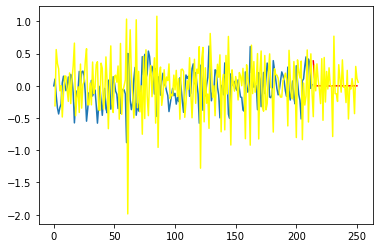

In [38]:
test_un_error = mean_squared_error(test_pr,test)
train_error = mean_squared_error(train_pr, train)
print('Test MSE: %.3f' % test_un_error)
print('Train MSE: %.3f' % train_error)
# plot
pyplot.plot(test_un_prd,color='red',label='test_unroll')
pyplot.plot(train_prd,label='train')
pyplot.plot(df.newlnp,color='yellow',label='true')
pyplot.savefig('arima_unroll.png')

In [41]:
from math import sqrt

rms_test = sqrt(mean_squared_error(test_pr,test))
rms_train = sqrt(mean_squared_error(train_pr, train))
print('Test RMSE: %.3f' % rms_test)
print('Train RMSE: %.3f' % rms_train)

Test RMSE: 0.303
Train RMSE: 0.334


Test MSE: 0.069
Train MSE: 0.111


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


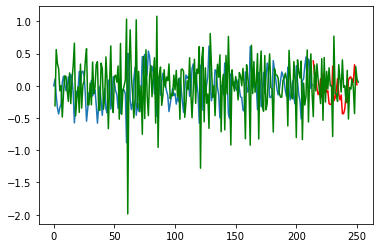

Test MSE: 0.069
Train MSE: 0.111


In [42]:
test_error = mean_squared_error(test, predictions)
train_error = mean_squared_error(train_pr, train)
print('Test MSE: %.3f' % test_error)
print('Train MSE: %.3f' % train_error)
# plot
pyplot.plot(test_prd,color='red')
pyplot.plot(train_prd)
pyplot.plot(df.newlnp,color='yellow')
pyplot.show('arima_roll.png')
print('Test MSE: %.3f' % test_error)
print('Train MSE: %.3f' % train_error)

In [43]:
from math import sqrt

rms_test = sqrt(mean_squared_error(test, predictions))
rms_train = sqrt(mean_squared_error(train_pr, train))
print('Test RMSE: %.3f' % rms_test)
print('Train RMSE: %.3f' % rms_train)

Test RMSE: 0.263
Train RMSE: 0.334


In [44]:
l = [0.010969773,
 0.09733404,
 0.02654858,
 0.012537777,
 0.18915033,
 -0.5528395,
 0.1483934,
 0.75431705,
 -0.26235792,
 0.80312854,
 -1.2675344,
 -0.09482199,
 0.73810565,
 -0.20452318,
 0.34556597,
 -0.7698786,
 0.4310249,
 0.70676935,
 -0.66000557,
 -0.20940149,
 0.25797734,
 -0.08887705,
 0.04173267,
 -0.1186437,
 -0.2927614,
 0.5894355,
 -0.8074749,
 0.38266274,
 0.98969424,
 -0.32224667,
 0.90505433,
 -0.5568105,
 0.002101481,
 -0.51848435,
 0.1850684,
 0.17700315,
 0.46224296]

In [46]:
rms_test = sqrt(mean_squared_error(test, l))
print('Train RMSE: %.3f' % rms_test)

Train RMSE: 0.578
